In [14]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import linear_model
import tarfile
from six.moves import urllib
from sklearn.linear_model import LinearRegression

In [33]:
print('current working dir:', os.getcwd())
data_path = "/home/topol/user2/Hands-On-Machine-Learning-Projects/datasets/"

## collect oecd_bli data
oecd_bli = pd.read_csv (data_path + 'oecd_bli_2015.csv', thousands = ',')


oecd_bli.head()

current working dir: /home/topol/user2/Hands-On-Machine-Learning-Projects/Introduction/Model_based_learning


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [34]:
oecd_bli.shape

(2369, 17)

#### lets minimize our data and focus only on certan countries: where only total inequality data `TOT` is considered

In [35]:
## Filter the data to include only rows where INEQUALITY is "TOT"
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

## Dataframe such that countries are the index, indicators are columns, and values are the data
oecd_bli = oecd_bli.pivot(index="Country", columns= "Indicator", values= "Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


In [30]:
oecd_bli.shape

(42, 24)

#### Data is nicely minimized from size (2369, 17) to (42 rows, 24 columns)

In [36]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.1
Austria      7.2
Belgium      6.8
Brazil       6.1
Canada       7.0
Name: Life satisfaction, dtype: float64

#### 

#### The `oecd_bli` Focuses on well-being and quality of life. It includes everything such as happiness, health, education, work-life balance and so on 

#### On the other hand, `gdp_per_capita` which Often used as an indicator of a country's standard of living: higher GDP per capita typically indicates better living standards and economic well-being.

In [37]:
## collect GDP data

gdp_per_capita = pd.read_csv(data_path + "GDP_per_capita.csv", thousands = ',', 
                              delimiter = '\t', encoding = 'latin1')
gdp_per_capita.rename(columns= {"2015": "GDP per capita"}, inplace = True)
gdp_per_capita.set_index ("Country", inplace = True)


gdp_per_capita.head (5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [39]:
gdp_per_capita.shape

(190, 6)

#### Lets define the country statistics: using pandas we combine the two data frames `oecd_bli` and `gdp_per_capita`

In [40]:
country_stats = pd.merge(left= oecd_bli, right = gdp_per_capita, left_index= True, right_index= True)
country_stats.sort_values(by = "GDP per capita", inplace = True)


country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,28.5,35.9,48.0,15.4,39.0,40.0,13.7,9338.0,NaN,18.1,...,NaN,66.0,72.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,22.6,12.3,59.0,23.7,58.0,50.0,23.1,NaN,NaN,NaN,...,NaN,53.0,82.0,14.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,80.0,70.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,20.3,25.9,42.0,27.0,59.0,42.0,26.8,16269.0,NaN,17.8,...,NaN,63.0,75.0,15.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,11.8,13.8,95.0,0.1,70.0,64.0,4.8,19546.0,NaN,17.4,...,NaN,68.0,62.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [41]:
country_stats.shape

(39, 30)

### Data Preprocessing

In [42]:
## check information about data
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, South Africa to Luxembourg
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      39 non-null     float64
 1   Dwellings without basic facilities                 36 non-null     float64
 2   Educational attainment                             38 non-null     float64
 3   Employees working very long hours                  37 non-null     float64
 4   Employment rate                                    39 non-null     float64
 5   Feeling safe walking alone at night                39 non-null     float64
 6   Homicide rate                                      39 non-null     float64
 7   Household net adjusted disposable income           34 non-null     float64
 8   Household net wealth                               29 non-null     float64
 9 

In [43]:
country_stats.dtypes

Air pollution                                        float64
Dwellings without basic facilities                   float64
Educational attainment                               float64
Employees working very long hours                    float64
Employment rate                                      float64
Feeling safe walking alone at night                  float64
Homicide rate                                        float64
Household net adjusted disposable income             float64
Household net wealth                                 float64
Housing expenditure                                  float64
Labour market insecurity                             float64
Life expectancy                                      float64
Life satisfaction                                    float64
Long-term unemployment rate                          float64
Personal earnings                                    float64
Quality of support network                           float64
Rooms per person        

In [49]:
print(country_stats[['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes']])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2566889272.py, line 1)

[[6.37505658]]


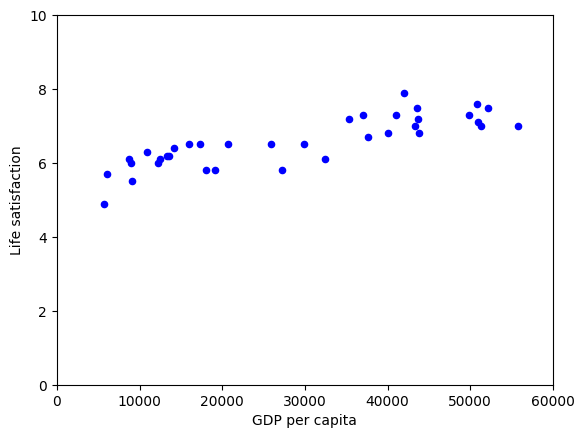

In [15]:
#oecd_bli = pd.read_csv (DATA_PATH + "oecd_bli_2015.csv", thousands = ',')
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot (kind = 'scatter', x = "GDP per capita", y = "Life satisfaction", color = 'blue')
model = sklearn.linear_model.LinearRegression ()
model.fit(x, y)


#predict new/ train model/ test model
x_new = [[22587]]
print (model.predict(x_new))
plt.axis ([0, 60000, 0, 10])
plt.show ()

In [16]:
# study single country or two..
country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.000
Name: United States, dtype: float64